<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Bitcoin_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pytrends

In [44]:
import pandas as pd
from pytrends.request import TrendReq
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [3]:
pytrend = TrendReq()

In [5]:
#provide your search terms
kw_list=['bitcoin', 'stocks', 'real estate', 'bonds']

#search interest per region
pytrend.build_payload(kw_list, timeframe='today 12-m')

# Interest by Region
regiondf_12m = pytrend.interest_by_region()

In [6]:
# Now, we can use this logic to create the mask between brackets that is 
# passed to the regiondf_12m DataFrame to remove the rows with no results:
# #looking at rows where all values are not equal to 0
regiondf_12m = regiondf_12m[regiondf_12m.sum(axis=1)!=0]

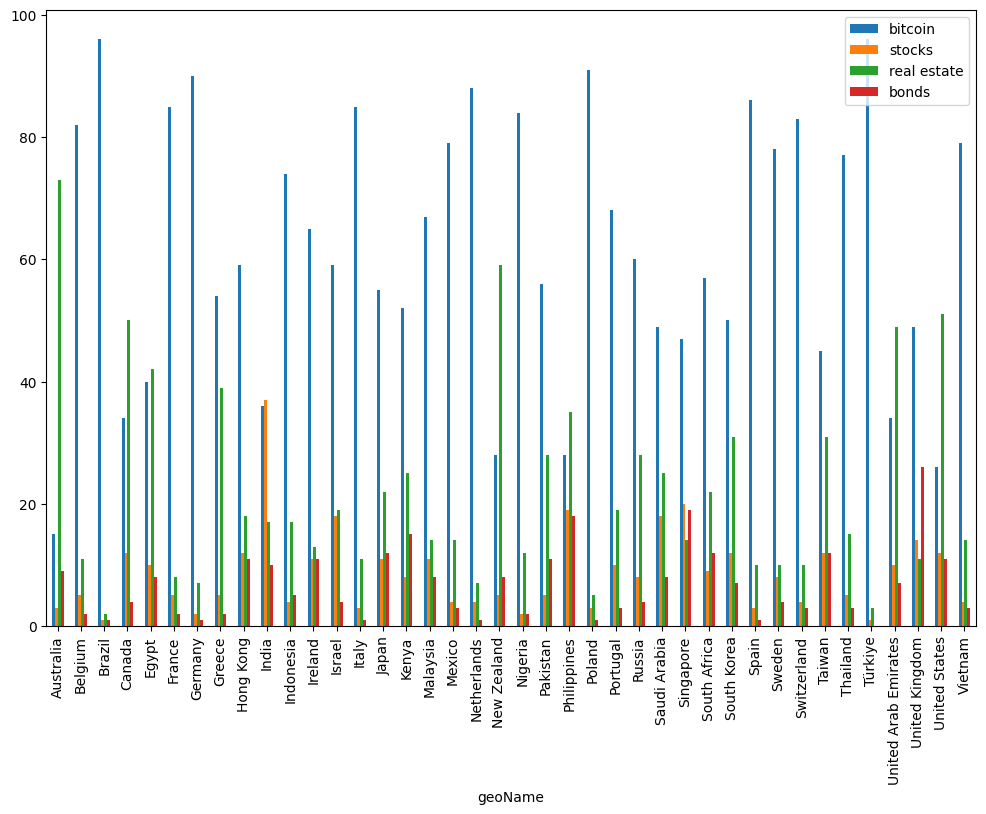

In [13]:
# visualize
regiondf_12m.plot(figsize=(12, 8), y=kw_list, kind ='bar');

<Axes: xlabel='geoName'>

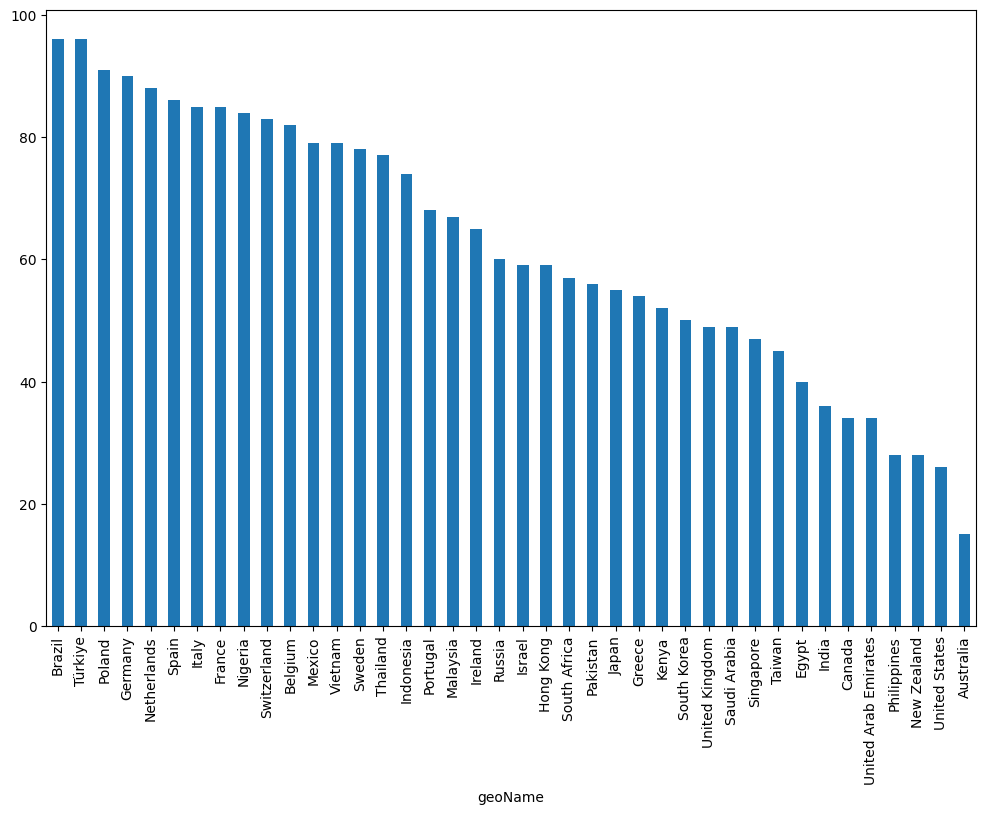

In [12]:
# To do this, we need to select the column, sort the values in ascending order, 
# and use the plot method to draw a bar chart indicating the regions where the 
# search term was a larger relative fraction of the total regional searches:
regiondf_12m['bitcoin'].sort_values(ascending= False).plot(figsize=(12, 8),                              
    y=regiondf_12m['bitcoin'].index,kind ='bar');

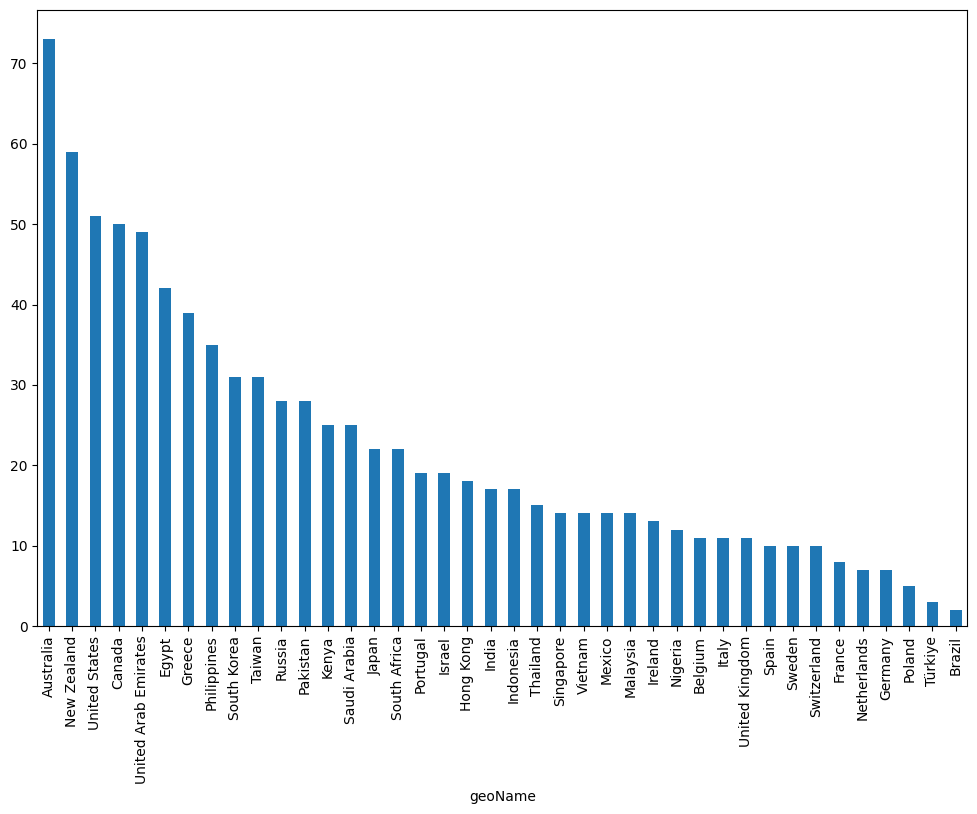

In [16]:
regiondf_12m['real estate'].sort_values(ascending= False).plot(figsize=(12, 8),
      y=regiondf_12m['real estate'].index,kind ='bar');

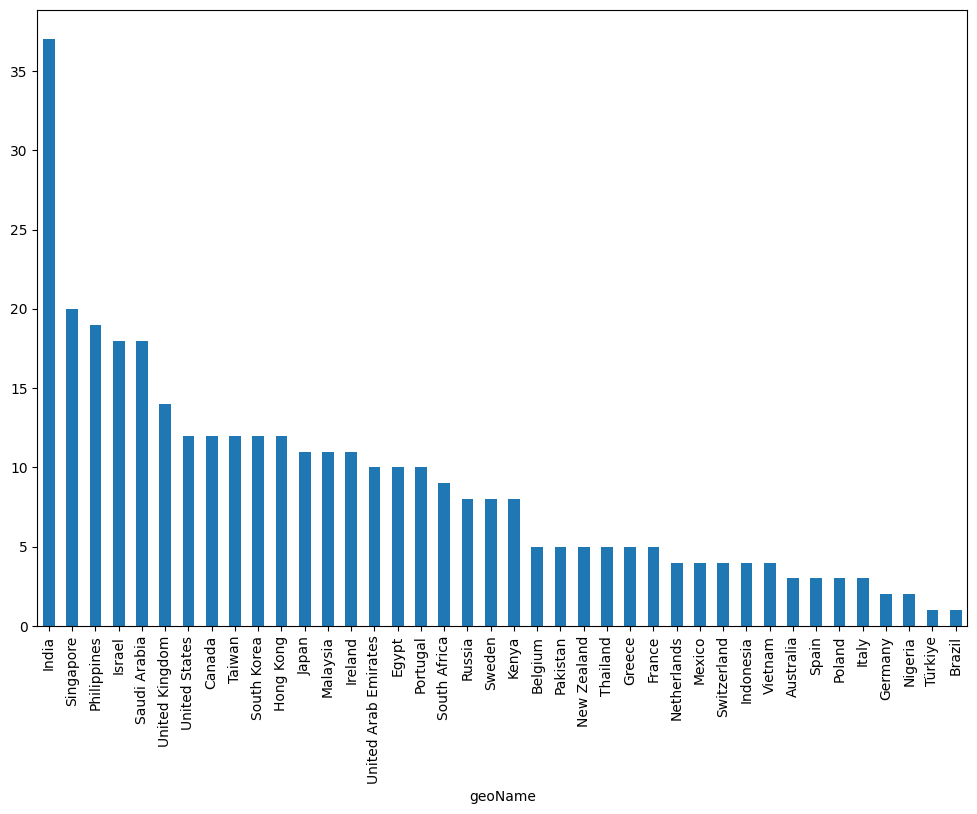

In [17]:
regiondf_12m['stocks'].sort_values(ascending= False).plot(figsize=(12, 8),
     y=regiondf_12m['stocks'].index,kind ='bar');

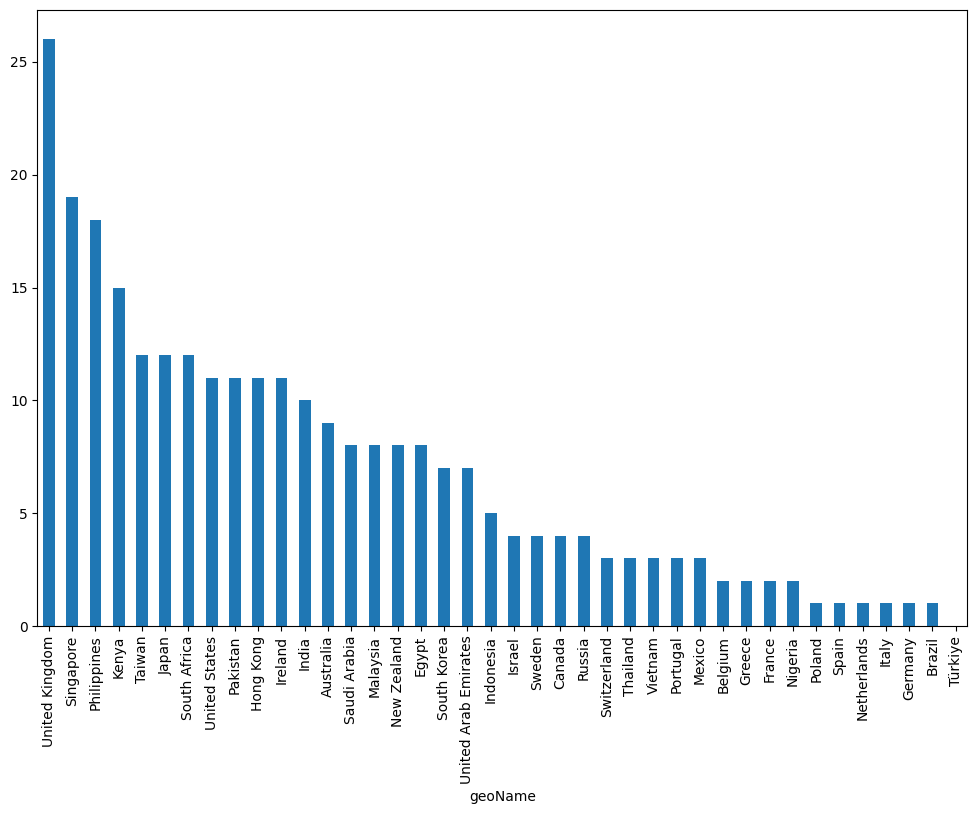

In [18]:
regiondf_12m['bonds'].sort_values(ascending= False).plot(figsize=(12, 8), 
     y=regiondf_12m['bonds'].index, kind ='bar');

In [20]:
#search interest per region
pytrend = TrendReq()
pytrend.build_payload(kw_list, timeframe='today 3-m')

# Interest by Region
regiondf_3m = pytrend.interest_by_region()

In [21]:
# e need to remove the rows that don’t have results for the search terms specified:
# #looking at rows where all values are not equal to 0

regiondf_3m = regiondf_3m[regiondf_3m.sum(axis=1)!=0]

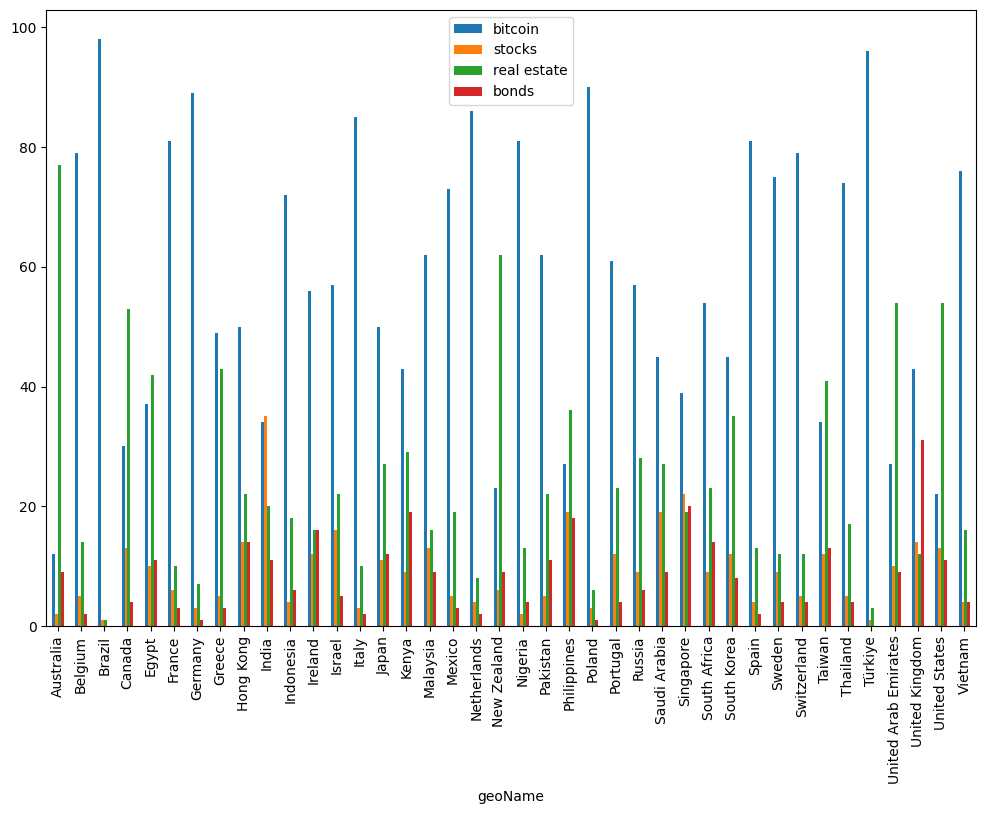

In [23]:
# visualize
regiondf_3m.plot(figsize=(12, 8), y=kw_list, kind ='bar');

In [27]:
# The first step is to create a DataFrame that contains the information from
#  both the last 12 months and the last 3 months:
cols = ['stocks_3m','stocks_12m','bitcoin_3m', 'bitcoin_12m','real_estate_3m',
        'real_estate_12m','bonds_3m','bonds_12m']
df = pd.DataFrame([regiondf_3m['stocks'],
                  regiondf_12m['stocks'],
                  regiondf_3m['bitcoin'],
                  regiondf_12m['bitcoin'],
                  regiondf_3m['real estate'],
                  regiondf_12m['real estate'],
                  regiondf_3m['bonds'],
                  regiondf_12m['bonds']]).T
df.columns = cols

In [28]:
df.head()

,stocks_3m,stocks_12m,bitcoin_3m,bitcoin_12m,real_estate_3m,real_estate_12m,bonds_3m,bonds_12m
geoName,,,,,,,,
Australia,2,3,12,15,77,73,9,9
Belgium,5,5,79,82,14,11,2,2
Brazil,1,1,98,96,1,2,0,1
Canada,13,12,30,34,53,50,4,4
Egypt,10,10,37,40,42,42,11,8


In [29]:
df['diff_stocks'] = df['stocks_12m'] - df['stocks_3m']
df['diff_bitcoin'] = df['bitcoin_12m'] - df['bitcoin_3m']
df['diff_real_estate'] = df['real_estate_12m'] - df['real_estate_3m']
df['diff_bonds'] = df['bonds_12m'] - df['bonds_3m']
# Inspect the new created columns
df.head()

,stocks_3m,stocks_12m,bitcoin_3m,bitcoin_12m,real_estate_3m,real_estate_12m,bonds_3m,bonds_12m,diff_stocks,diff_bitcoin,diff_real_estate,diff_bonds
geoName,,,,,,,,,,,,
Australia,2,3,12,15,77,73,9,9,1,3,-4,0
Belgium,5,5,79,82,14,11,2,2,0,3,-3,0
Brazil,1,1,98,96,1,2,0,1,0,-2,1,1
Canada,13,12,30,34,53,50,4,4,-1,4,-3,0
Egypt,10,10,37,40,42,42,11,8,0,3,0,-3


In [30]:
n_cols = ['diff_stocks','diff_bitcoin', 'diff_real_estate','diff_bonds']
df = df[n_cols]
df.head()

,diff_stocks,diff_bitcoin,diff_real_estate,diff_bonds
geoName,,,,
Australia,1,3,-4,0
Belgium,0,3,-3,0
Brazil,0,-2,1,1
Canada,-1,4,-3,0
Egypt,0,3,0,-3


In [31]:
# Some countries have no changes, so we will filter them out by summing 
# across the axis and comparing this result to zero to create a mask that 
# we can use to filter out these cases:
# Create a mask for of the null results
mask = df.abs().sum(axis=1)!=0
df = df[mask]
df.head()

,diff_stocks,diff_bitcoin,diff_real_estate,diff_bonds
geoName,,,,
Australia,1,3,-4,0
Belgium,0,3,-3,0
Brazil,0,-2,1,1
Canada,-1,4,-3,0
Egypt,0,3,0,-3


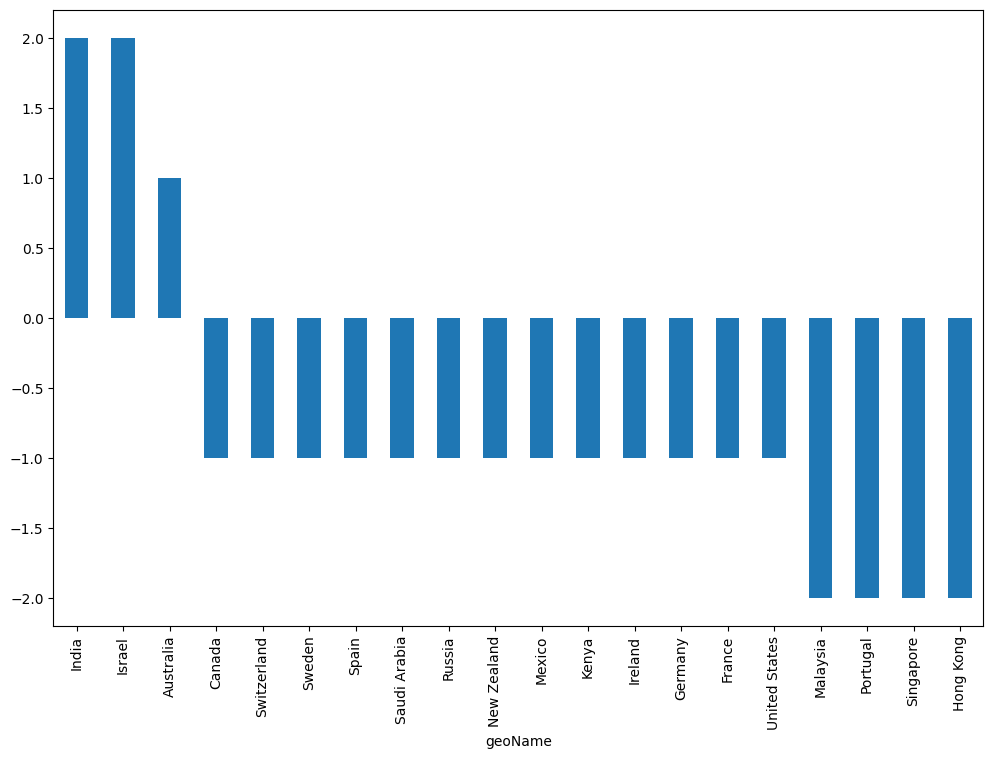

In [33]:
data = df['diff_stocks'][df['diff_stocks']!=0]
data = data.sort_values(ascending = False)
data.plot(figsize=(12, 8),y=data.index, kind ='bar');

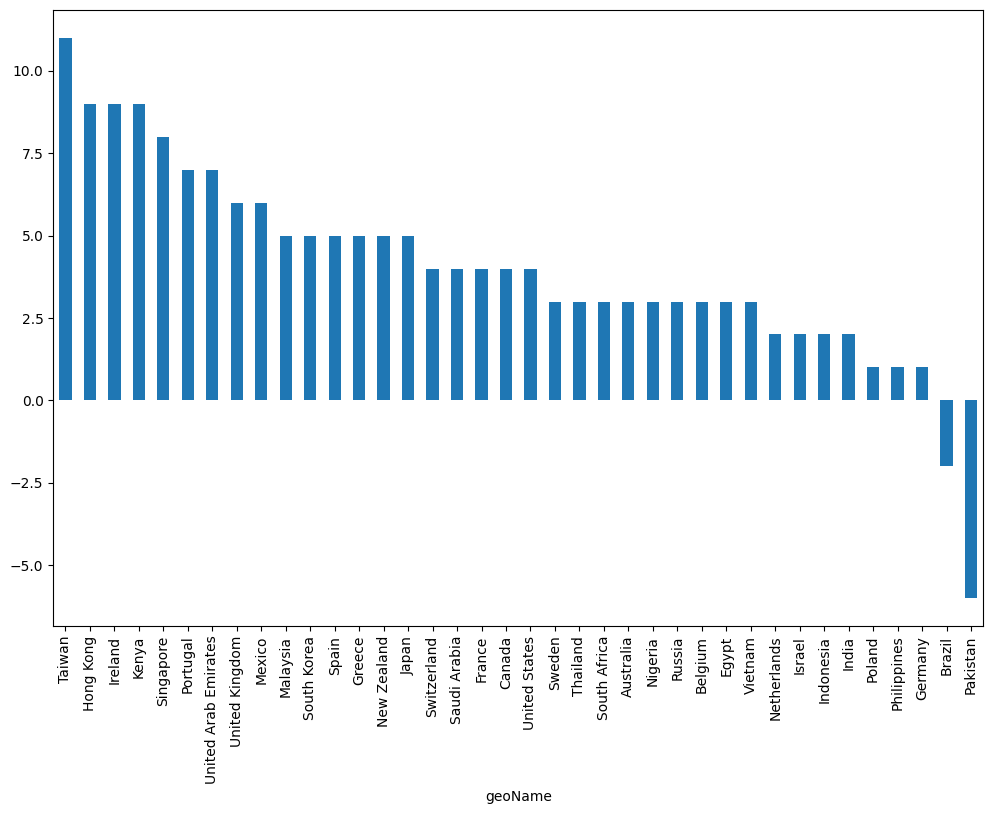

In [35]:
df['diff_bitcoin'][df['diff_bitcoin']!=0].sort_values(ascending = False).plot(figsize=(12, 8), y=df['diff_bitcoin']
    [df['diff_bitcoin']!=0].index,kind ='bar');

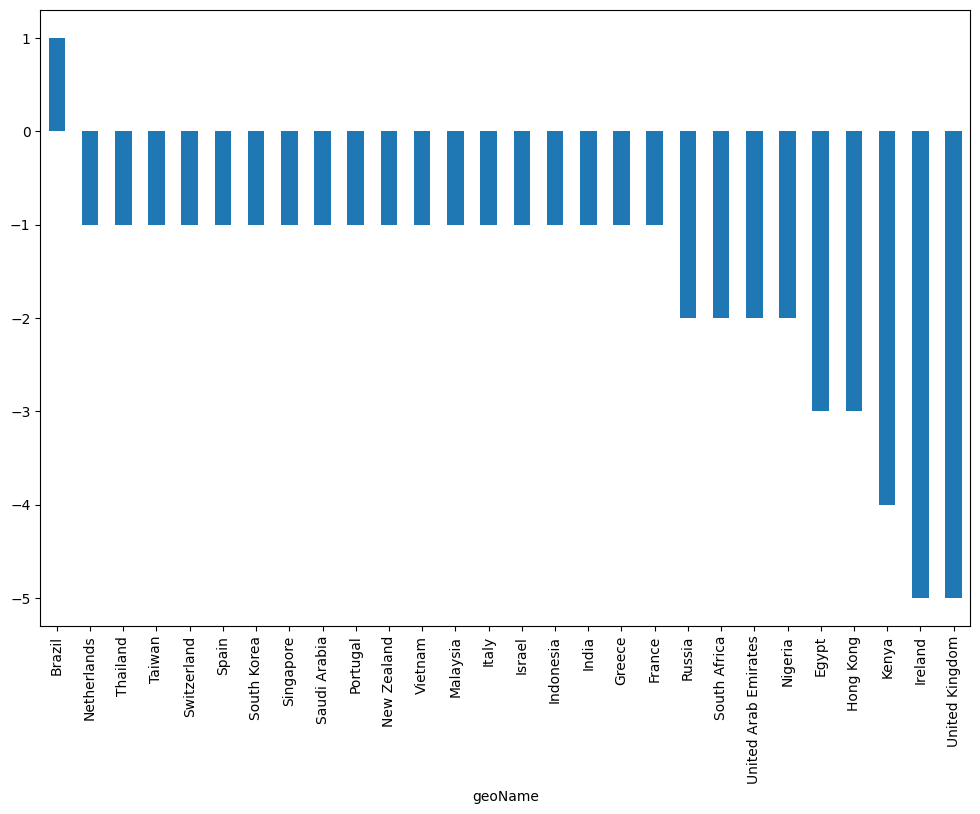

In [37]:
# The next block of code illustrates the same effect in the case of bonds:
df['diff_bonds'][df['diff_bonds']!=0
    ].sort_values(ascending = False).plot(figsize=(12, 8),y = df['diff_bonds'
    ][df['diff_bonds']!=0].index,kind ='bar');


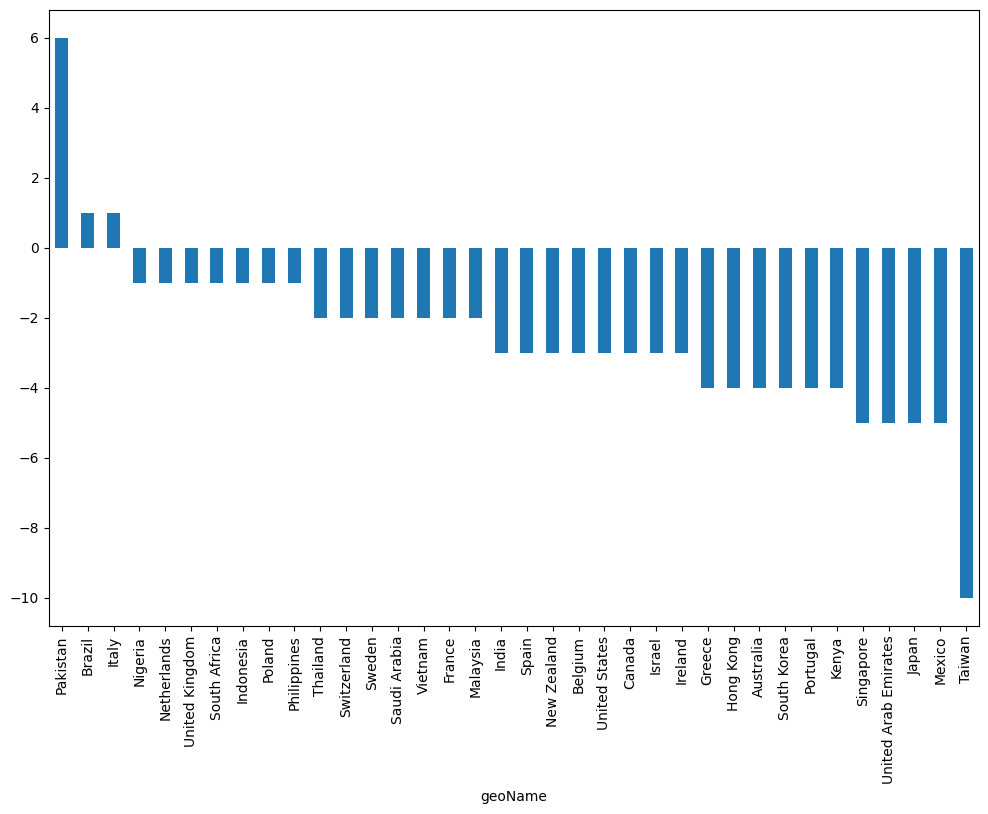

In [39]:
# Finally, the next block of code shows the search variations in the search term real estate:
df['diff_real_estate'][df['diff_real_estate']!=0
                       ].sort_values(ascending = False).plot(figsize=(12, 8),
                        y=df['diff_real_estate'][df['diff_real_estate'
                            ]!=0].index,kind ='bar');

In [42]:
# In the next block of code, we will define a series of regions 
# in which we want to look for the related queries for a given timeframe. 
# In this case, we will be looking at the USA, Canada, New Zealand, 
# and Australia. The results will be arranged into a single pandas DataFrame:

geo = ['US','CA','NZ','AU']
d_full = pd.DataFrame()
for g in geo:
  pytrend.build_payload(kw_list=['bitcoin','stocks'],
  geo=g,timeframe='today 3-m')
  
  #get related queries
  related_queries = pytrend.related_queries()
  
  # Bitcoin top
  d = related_queries['bitcoin']['top']
  d['source_query'] = 'bitcoin'
  d['type'] = 'top'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)
  
  # Bitcoin rising
  d = related_queries['bitcoin']['rising']
  d['source_query'] = 'bitcoin'
  d['type'] = 'rising'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)
  
  # stocks top
  d = related_queries['stocks']['top']
  d['source_query'] = 'stocks'
  d['type'] = 'top'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)
  
  # stocks rising
#   d = related_queries['stocks']['rising']
#   d['source_query'] = 'stocks'
#   d['type'] = 'rising'
#   d['geo'] = g
#   d_full = pd.concat([d_full,d],axis=0)

In [43]:
d_full = d_full.reset_index(drop=True)
d_full.head(10)

,query,value,source_query,type,geo
0,bitcoin price,100,bitcoin,top,US
1,bitcoin stock,14,bitcoin,top,US
2,bitcoin stock price,12,bitcoin,top,US
3,bitcoin usd,11,bitcoin,top,US
4,bitcoin price usd,9,bitcoin,top,US
5,bitcoin today,8,bitcoin,top,US
6,ethereum price,7,bitcoin,top,US
7,ethereum,7,bitcoin,top,US
8,bitcoin price today,6,bitcoin,top,US
9,price of bitcoin,5,bitcoin,top,US


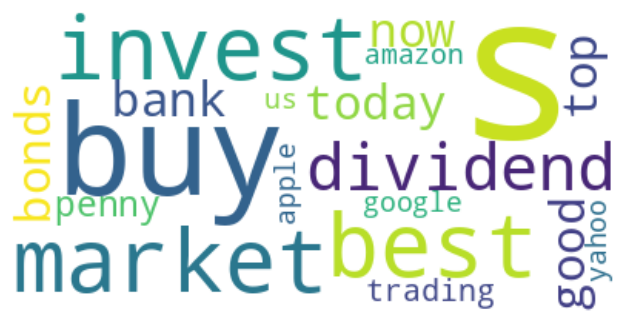

In [54]:
data = d_full[(d_full['source_query']=='stocks')&(
      d_full['type']=='top')&(d_full['geo']=='US')]

text = " ".join(i for i in data['query']).replace('stock','')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()      

In [55]:
query_data = d_full[(d_full['source_query']=='bitcoin' 
                     )&(d_full['type']=='rising'
                     )&(d_full['geo']=='US')]
query_data.head()

,query,value,source_query,type,geo
25,frc stock,11050,bitcoin,rising,US
26,first republic bank stock,9950,bitcoin,rising,US
27,svb stock,6050,bitcoin,rising,US
28,signature bank,1150,bitcoin,rising,US
29,silvergate,400,bitcoin,rising,US


In [58]:
# We will use the top five resulting queries to track their performance in the last 12 months:
kw_list = query_data.head()['query'].tolist() # list of keywords to get data
# build payload
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m')
# Interest over Time
data = pytrend.interest_over_time()
data = data.reset_index()
data.head()

,date,frc stock,first republic bank stock,svb stock,signature bank,silvergate,isPartial
0,2022-05-22,0,0,0,0,0,False
1,2022-05-29,0,0,3,5,0,False
2,2022-06-05,0,0,0,3,0,False
3,2022-06-12,0,2,2,5,0,False
4,2022-06-19,0,3,0,4,0,False


In [59]:
import plotly.express as px
fig = px.line(data, x="date", y=kw_list, title='Keyword Web Search Interest Over Time')
fig.show()